In [1]:
import pandas as pd
import zipfile
import os
import matplotlib.pyplot as plt
import torch.optim as optim

In [2]:
pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
dataset_path = "FETAL_PLANES_ZENODO.zip"
extracted_dir = "FETAL_PLANES_ZENODO"
os.makedirs(extracted_dir, exist_ok=True)

In [7]:
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)
print("Dataset has been extracted.")

Dataset has been extracted.


In [3]:
current_directory = os.getcwd()
print("Current working directory:",current_directory)

Current working directory: /home/jupyter/deep


In [4]:
directory_path = "FETAL_PLANES_ZENODO/"

# Set the current directory to the desired path
os.chdir(directory_path)

In [5]:
current_directory = os.getcwd()
print("Current working directory:",current_directory)

Current working directory: /home/jupyter/deep/FETAL_PLANES_ZENODO


In [6]:
# Load the CSV file into a DataFrame
df = pd.read_excel("FETAL_PLANES_DB_data.xlsx")

# Check the unique values and their counts in the "Plane" column
class_counts = df['Plane'].value_counts()

# Display the result
print(class_counts)

Plane
Other              4213
Fetal brain        3092
Fetal thorax       1718
Maternal cervix    1626
Fetal femur        1040
Fetal abdomen       711
Name: count, dtype: int64


# Concat brain plane with plane

In [7]:
df['Plane']  #= df.apply(lambda row: row['Plane'] + ' ' + row['Brain_plane'] if row['Plane'] == 'Fetal brain' else row['Plane'], axis=1)

0                Other
1                Other
2                Other
3                Other
4                Other
             ...      
12395      Fetal femur
12396    Fetal abdomen
12397      Fetal brain
12398      Fetal femur
12399     Fetal thorax
Name: Plane, Length: 12400, dtype: object

In [8]:
# Check the unique values and their counts in the "Plane" column
class_counts = df['Plane'].value_counts()
total_count = len(df)

# Display the result
print(class_counts)
print("The length of the df" , total_count)

Plane
Other              4213
Fetal brain        3092
Fetal thorax       1718
Maternal cervix    1626
Fetal femur        1040
Fetal abdomen       711
Name: count, dtype: int64
The length of the df 12400


In [9]:
# Calculate the percentage for each class
percentages = (class_counts / total_count) * 100

# Display the result
print(percentages)

Plane
Other              33.975806
Fetal brain        24.935484
Fetal thorax       13.854839
Maternal cervix    13.112903
Fetal femur         8.387097
Fetal abdomen       5.733871
Name: count, dtype: float64


In [10]:
from sklearn.utils import resample
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [11]:
randomly_selected_data = pd.DataFrame()
target_count = 500

In [12]:
for class_label in df['Plane'].unique():
    # Select only the rows corresponding to the current class
    class_data = df[df['Plane'] == class_label]

    # Randomly sample 143 images from the current class
    sampled_data = class_data.sample(n=target_count, random_state=42)

    # Concatenate the sampled data with the overall randomly selected dataset
    randomly_selected_data = pd.concat([randomly_selected_data, sampled_data])

# Shuffle the randomly selected data
randomly_selected_data = randomly_selected_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
randomly_selected_data

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient01229_Plane3_1_of_4,1229,Fetal brain,Trans-cerebellum,Op. 1,Voluson E6,0
1,Patient01146_Plane2_1_of_1,1146,Fetal abdomen,Not A Brain,Op. 1,Voluson E6,1
2,Patient01332_Plane3_3_of_4,1332,Fetal brain,Trans-thalamic,Op. 3,Aloka,0
3,Patient00890_Plane1_17_of_19,890,Other,Not A Brain,Op. 3,Aloka,1
4,Patient00942_Plane6_1_of_4,942,Fetal thorax,Not A Brain,Op. 1,Voluson E6,1
...,...,...,...,...,...,...,...
2995,Patient00811_Plane3_2_of_5,811,Fetal brain,Trans-ventricular,Op. 3,Aloka,1
2996,Patient01196_Plane2_1_of_1,1196,Fetal abdomen,Not A Brain,Op. 1,Voluson E6,1
2997,Patient01665_Plane2_1_of_1,1665,Fetal abdomen,Not A Brain,Op. 2,Voluson E6,0
2998,Patient00868_Plane2_1_of_2,868,Fetal abdomen,Not A Brain,Op. 3,Aloka,1


In [14]:
class_counts = randomly_selected_data['Plane'].value_counts()
total_count = len(randomly_selected_data)

# Display the result
print(class_counts)
print("The length of the df" , total_count)

Plane
Fetal brain        500
Fetal abdomen      500
Other              500
Fetal thorax       500
Fetal femur        500
Maternal cervix    500
Name: count, dtype: int64
The length of the df 3000


In [15]:
# Calculate the percentage for each class
percentages = (class_counts / total_count) * 100

# Display the result
print(percentages)

Plane
Fetal brain        16.666667
Fetal abdomen      16.666667
Other              16.666667
Fetal thorax       16.666667
Fetal femur        16.666667
Maternal cervix    16.666667
Name: count, dtype: float64


In [16]:
X,Y = randomly_selected_data["Image_name"], randomly_selected_data["Plane"]

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform Y
Y_encoded = label_encoder.fit_transform(Y)

print("Original labels:", Y)
print("Encoded labels:", Y_encoded)

Original labels: 0           Fetal brain
1         Fetal abdomen
2           Fetal brain
3                 Other
4          Fetal thorax
             ...       
2995        Fetal brain
2996      Fetal abdomen
2997      Fetal abdomen
2998      Fetal abdomen
2999    Maternal cervix
Name: Plane, Length: 3000, dtype: object
Encoded labels: [1 0 1 ... 0 0 4]


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, Y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [19]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

In [20]:
class FetailImageDataset(Dataset):
    def __init__(self, X , Y, transform=None):
        self.image_name = X
        self.labels = Y
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_name = self.image_name.iloc[idx]
        img_path = os.path.join("Images/", img_name + ".png")

        # Open image
        img = Image.open(img_path)

        # Convert label to PyTorch tensor
        label = self.labels[idx]

        # Apply transforms if available
        if self.transform:
            img = self.transform(img)

        return img, label

In [23]:
transform = transforms.Compose([
    transforms.Resize((250, 250)),          # Resize image to a fixed size
    transforms.RandomRotation(degrees=15),  # Random rotation by a maximum of 15 degrees
    transforms.RandomHorizontalFlip(),      # Random horizontal flip with a probability of 0.5
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),# Convert PIL image to tensor
    transforms.Normalize(0.5, 0.5)
])

In [24]:
train_Dataset = FetailImageDataset(X_train,y_train, transform=transform)
test_Dataset = FetailImageDataset(X_test,y_test, transform=transform)
val_Dataset = FetailImageDataset(X_val,y_val, transform=transform)

In [24]:
y_train[0]

5

In [25]:
from torch.utils.data import DataLoader

In [26]:
batch_size = 2

train_loader = DataLoader(train_Dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_Dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_Dataset, batch_size=batch_size, shuffle=False)

In [27]:
# Assuming train_loader is your DataLoader object
batch_idx = 0  # Index of the batch you want to retrieve

# Get the first batch from the train_loader
for batch_idx, (imgs, labels) in enumerate(train_loader):
    if batch_idx == batch_idx:  # Check if this is the desired batch
        break  # Stop iterating once the desired batch is retrieved

# Now imgs and labels contain the data from the desired batch
# Print the shape of the first image and the batch size
print("Shape of the first image:", imgs[0].shape)
print("Batch size:", len(imgs))

Shape of the first image: torch.Size([1, 250, 250])
Batch size: 2


In [28]:
img ,label = train_Dataset[0]

In [29]:
img.shape

torch.Size([1, 250, 250])

In [27]:
def train(model, train_loader, test_loader, criterion, optimizer, num_epochs):

    train_losses = []
    test_losses = []
    accuracies = []
    best_test_loss = float('inf')
    no_improvement_count = 0
    patience = 4

    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.cuda(), labels.cuda()

            optimizer.zero_grad()
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            
            loss.backward()  # Backward pass
            optimizer.step()  # Update model parameters

            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.sampler)
        train_losses.append(epoch_loss)

        

        correct = 0
        total = 0
        test_loss = 0.0

        
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient calculation for inference
            for inputs, labels in test_loader:
                inputs, labels = inputs.cuda(), labels.cuda()

                outputs = model(inputs)  # Forward pass
                loss = criterion(outputs, labels)
                test_loss += loss.item() * labels.size(0)

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        test_loss = test_loss / len(test_loader.sampler)
        test_losses.append(test_loss)

        accuracy = (correct / total) * 100
        accuracies.append(accuracy)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Training Loss: {epoch_loss:.4f}, '
              f'Testing Loss: {test_loss:.4f}, '
              f'Accuracy on test set: {accuracy:.2f}%')
        
        # Early stopping: check if test loss has stopped improving
        if test_loss <= best_test_loss:
            best_test_loss = test_loss
            no_improvement_count = 0
        else:
            no_improvement_count += 1

        if no_improvement_count >= patience:
            print(f"No improvement in test loss for {patience} epochs. Stopping training.")
            break

    # Plot learning curve
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

    return train_losses, test_losses, accuracies

In [28]:
import torch
import torch.nn as nn

class fetalModel(nn.Module):
    def __init__(self):
        super(fetalModel, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.MaxPool2d(kernel_size=3, stride=1)
        )
        
        # Define convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=2, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=24, kernel_size=1, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(24),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )

        # Define fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(24*251*251, 200),
            nn.ReLU(),
            nn.Linear(200, 6)  # Adjusted to have 9 output labels
        )

    def forward(self, x):
        # Apply convolutional layers
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        
        # Flatten the output before passing to fully connected layer
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = self.fc(x)
        # Apply fully connected layers
        #print(x.shape)

        return x

In [29]:
def eval(model, val_loader, criterion, optimizer):

  model.eval()  # Set model to evaluation mode

  with torch.no_grad():  # Disable gradient calculation for inference
      correct = 0
      total = 0
      for inputs, labels in val_loader:
          # Forward pass
          inputs,labels = inputs.cuda(),labels.cuda()

          outputs = model(inputs)

          # Get predicted labels
          _, predicted = torch.max(outputs, 1)


          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  # Calculate accuracy
  accuracy = (correct / total) * 100
  print(f"Accuracy on validation set: {accuracy:.2f}%")

In [33]:
learning_rate = 0.0001
num_epochs = 20

# Initialize model
model = fetalModel().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [34]:
train_losses,test_losses,accuracy = train(model, train_loader, test_loader, criterion, optimizer, num_epochs)

KeyboardInterrupt: 

In [106]:
eval(model, val_loader, criterion, optimizer)

Accuracy on validation set: 80.44%


In [103]:
torch.save(model.state_dict(), 'modelV1.pth')

In [124]:
import torch
import torch.nn as nn

class fetalModelV2(nn.Module):
    def __init__(self):
        super(fetalModelV2, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(3),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
        # Define convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=6, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(6),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=9, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(9),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=9, out_channels=18, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(18),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=18, out_channels=21, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(21),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        

        # Define fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(21*125*125, 6),
        )

    def forward(self, x):
        # Apply convolutional layers
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        x = self.conv4(x)
        #print(x.shape)
        x = self.conv5(x)
        #print(x.shape)
        # Flatten the output before passing to fully connected layer
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = self.fc(x)
        # Apply fully connected layers
        #print(x.shape)

        return x

In [129]:
learning_rate = 1e-5
num_epochs = 50

# Initialize model
modelV2 = fetalModelV2().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(modelV2.parameters(), lr=learning_rate)

Epoch [1/50], Training Loss: 1.2699, Testing Loss: 1.6675, Accuracy on test set: 33.33%
Epoch [2/50], Training Loss: 0.8720, Testing Loss: 0.8308, Accuracy on test set: 69.56%
Epoch [3/50], Training Loss: 0.7748, Testing Loss: 0.8043, Accuracy on test set: 71.11%
Epoch [4/50], Training Loss: 0.6897, Testing Loss: 0.7210, Accuracy on test set: 74.44%
Epoch [5/50], Training Loss: 0.6404, Testing Loss: 0.6853, Accuracy on test set: 76.44%
Epoch [6/50], Training Loss: 0.5925, Testing Loss: 0.6435, Accuracy on test set: 77.11%
Epoch [7/50], Training Loss: 0.5792, Testing Loss: 0.6468, Accuracy on test set: 78.00%
Epoch [8/50], Training Loss: 0.5283, Testing Loss: 0.6607, Accuracy on test set: 78.00%
Epoch [9/50], Training Loss: 0.5127, Testing Loss: 0.6403, Accuracy on test set: 78.89%
Epoch [10/50], Training Loss: 0.4917, Testing Loss: 0.6422, Accuracy on test set: 78.22%
Epoch [11/50], Training Loss: 0.4664, Testing Loss: 0.6345, Accuracy on test set: 78.44%
Epoch [12/50], Training Loss: 

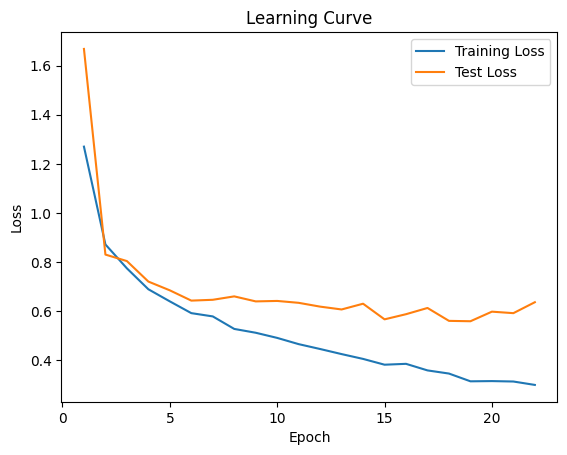

In [130]:
train_losses,test_losses,accuracy = train(modelV2, train_loader, test_loader, criterion, optimizer, num_epochs)

In [131]:
eval(modelV2, val_loader, criterion, optimizer)

Accuracy on validation set: 79.78%


In [141]:
torch.save(modelV2.state_dict(), 'modelV2.pth')

NameError: name 'modelV2' is not defined

In [113]:
import torch
import torch.nn as nn

class fetalModelV3(nn.Module):
    def __init__(self):
        super(fetalModelV3, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=12, kernel_size=5, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(12),
            nn.MaxPool2d(kernel_size=3, stride=1)
        )
        
        # Define convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        

        # Define fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(256*64*64, 6),
        )

    def forward(self, x):
        # Apply convolutional layers
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        x = self.conv4(x)
        #print(x.shape)
        
        # Flatten the output before passing to fully connected layer
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = self.fc(x)
        # Apply fully connected layers
        #print(x.shape)

        return x

In [124]:
learning_rate = 1e-5
num_epochs = 100

# Initialize model
modelV3 = fetalModelV3().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(modelV3.parameters(), lr=learning_rate)

Epoch [1/100], Training Loss: 0.9822, Testing Loss: 1.4160, Accuracy on test set: 50.44%
Epoch [2/100], Training Loss: 0.6129, Testing Loss: 0.6139, Accuracy on test set: 77.33%
Epoch [3/100], Training Loss: 0.4753, Testing Loss: 0.6290, Accuracy on test set: 76.67%
Epoch [4/100], Training Loss: 0.4273, Testing Loss: 0.5891, Accuracy on test set: 78.00%
Epoch [5/100], Training Loss: 0.3869, Testing Loss: 0.5716, Accuracy on test set: 80.22%
Epoch [6/100], Training Loss: 0.3339, Testing Loss: 0.5309, Accuracy on test set: 82.89%
Epoch [7/100], Training Loss: 0.3070, Testing Loss: 0.6422, Accuracy on test set: 80.22%
Epoch [8/100], Training Loss: 0.2791, Testing Loss: 0.5709, Accuracy on test set: 79.11%
Epoch [9/100], Training Loss: 0.2447, Testing Loss: 0.5179, Accuracy on test set: 83.33%
Epoch [10/100], Training Loss: 0.2110, Testing Loss: 0.5376, Accuracy on test set: 82.44%
Epoch [11/100], Training Loss: 0.1990, Testing Loss: 0.5366, Accuracy on test set: 83.78%
Epoch [12/100], Tra

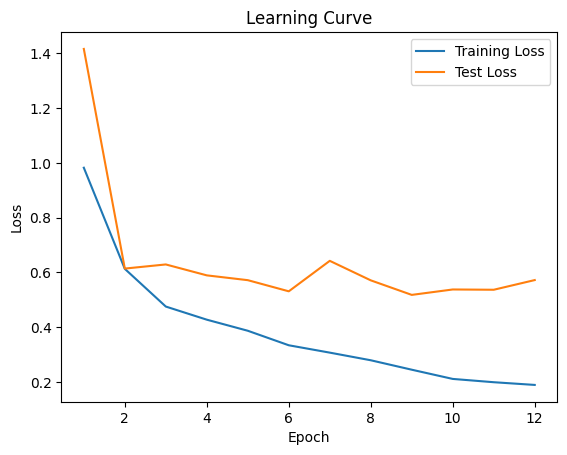

In [125]:
train_losses,test_losses,accuracy = train(modelV3, train_loader, test_loader, criterion, optimizer, num_epochs)

In [131]:
eval(modelV3, val_loader, criterion, optimizer)

Accuracy on validation set: 80.89%


In [140]:
torch.save(modelV3.state_dict(), 'modelV3.pth')

In [46]:
import gc
import torch

def free_memory():
    # Collect any garbage
    gc.collect()
    # Free up unoccupied cached memory
    torch.cuda.empty_cache()

# Example usage
# Run your model or operations that require GPU usage
# ...

# Free up memory
free_memory()


Trying to run another set of learn on modelV3 to see if i can do better 

Epoch [1/100], Training Loss: 0.1622, Testing Loss: 0.5090, Accuracy on test set: 84.67%
Epoch [2/100], Training Loss: 0.1599, Testing Loss: 0.5173, Accuracy on test set: 83.56%
Epoch [3/100], Training Loss: 0.1649, Testing Loss: 0.5381, Accuracy on test set: 82.00%
Epoch [4/100], Training Loss: 0.1501, Testing Loss: 0.5152, Accuracy on test set: 83.56%
No improvement in test loss for 3 epochs. Stopping training.


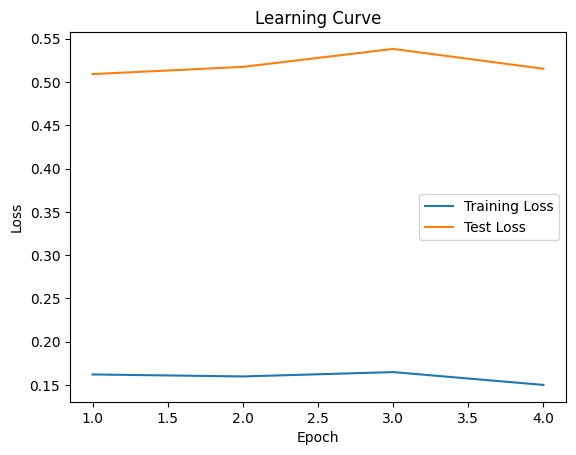

([0.1622074218023391,
  0.1598973877373196,
  0.16492915818733828,
  0.15011489746116458],
 [0.5090190056297514,
  0.5173341665003035,
  0.5380816029177772,
  0.5151716636286842],
 [84.66666666666667, 83.55555555555556, 82.0, 83.55555555555556])

In [132]:
train(modelV3, train_loader, test_loader, criterion, optimizer, num_epochs)

As we see as the model learns its under fitting clearly --> meaning it cant learn from the dataset 

In [136]:
import torch
import torch.nn as nn

class fetalModelV4(nn.Module):
    def __init__(self):
        super(fetalModelV4, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=12, kernel_size=5, stride=1, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1)
        )
        
        # Define convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        

        # Define fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(256*64*64, 6),
        )

    def forward(self, x):
        # Apply convolutional layers
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        x = self.conv4(x)
        #print(x.shape)
        
        # Flatten the output before passing to fully connected layer
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = self.fc(x)
        # Apply fully connected layers
        #print(x.shape)

        return x

In [137]:
learning_rate = 1e-5
num_epochs = 100

# Initialize model
modelV4 = fetalModelV4().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(modelV4.parameters(), lr=learning_rate)

In [147]:
train_losses,test_losses,accuracy = train(modelV4, train_loader, test_loader, criterion, optimizer, num_epochs)

KeyboardInterrupt: 

In [139]:
eval(modelV4, val_loader, criterion, optimizer)

Accuracy on validation set: 83.33%


In [142]:
torch.save(modelV4.state_dict(), 'modelV4.pth')

In [41]:
import torch
import torch.nn as nn

class fetalModelV5(nn.Module):
    def __init__(self):
        super(fetalModelV5, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=12, kernel_size=5, stride=3, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1)
        )
        
        # Define convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=12, out_channels=64, kernel_size=5, stride=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=1)
        )
        
         # Define convolutional layer
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=1, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=1, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
            
            

        # Define fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(512*25*25, 200),
            nn.Sigmoid(),
            nn.Linear(200, 64),
            nn.ReLU(),
            nn.Linear(64, 6),
        )

    def forward(self, x):
        # Apply convolutional layers
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        x = self.conv4(x)
        #print(x.shape)
        x = self.conv5(x)
        #print(x.shape)
        
        # Flatten the output before passing to fully connected layer
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = self.fc(x)
        # Apply fully connected layers
        #print(x.shape)

        return x

In [42]:
learning_rate = 1e-5
num_epochs = 100

# Initialize model
modelV5 = fetalModelV5().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(modelV5.parameters(), lr=learning_rate)

Epoch [1/100], Training Loss: 1.4125, Testing Loss: 1.2168, Accuracy on test set: 72.67%
Epoch [2/100], Training Loss: 1.0892, Testing Loss: 0.9892, Accuracy on test set: 79.11%
Epoch [3/100], Training Loss: 0.8875, Testing Loss: 0.8482, Accuracy on test set: 80.44%
Epoch [4/100], Training Loss: 0.7521, Testing Loss: 0.7146, Accuracy on test set: 83.11%
Epoch [5/100], Training Loss: 0.6390, Testing Loss: 0.6101, Accuracy on test set: 84.67%
Epoch [6/100], Training Loss: 0.5446, Testing Loss: 0.5728, Accuracy on test set: 85.33%
Epoch [7/100], Training Loss: 0.4786, Testing Loss: 0.5306, Accuracy on test set: 85.11%
Epoch [8/100], Training Loss: 0.4267, Testing Loss: 0.4592, Accuracy on test set: 86.89%
Epoch [9/100], Training Loss: 0.3742, Testing Loss: 0.4380, Accuracy on test set: 87.33%
Epoch [10/100], Training Loss: 0.3348, Testing Loss: 0.4070, Accuracy on test set: 86.44%
Epoch [11/100], Training Loss: 0.3011, Testing Loss: 0.4057, Accuracy on test set: 86.44%
Epoch [12/100], Tra

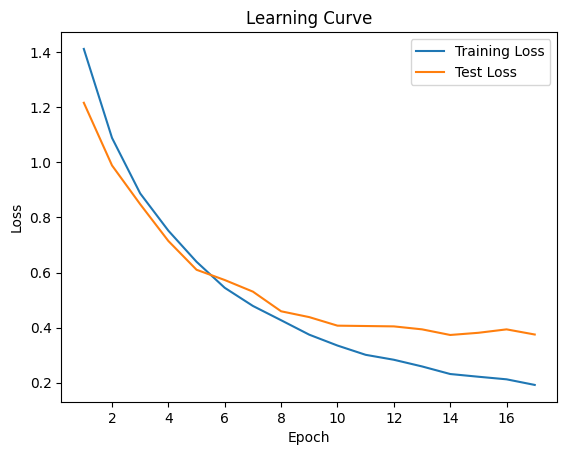

In [43]:
train_losses,test_losses,accuracy = train(modelV5, train_loader, test_loader, criterion, optimizer, num_epochs)

In [44]:
eval(modelV5, val_loader, criterion, optimizer)

Accuracy on validation set: 88.89%


In [46]:
torch.save(modelV5.state_dict(), 'modelV5.pth')

Lets check if v causes more issues if trained

In [51]:
train_losses,test_losses,accuracy = train(modelV5, train_loader, test_loader, criterion, optimizer, num_epochs)

KeyboardInterrupt: 

In [30]:
import torch
import torch.nn as nn

class fetalModelV6(nn.Module):
    def __init__(self):
        super(fetalModelV6, self).__init__()

        # Define convolutional layer
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=24, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1)
        )
        
        # Define convolutional layer
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=24, out_channels=64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=1)
        )
        
         # Define convolutional layer
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=1, stride=1)
        )
        
         # Define convolutional layer
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=5, stride=1)
        )
        
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=5, stride=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=7, stride=1)
        )
            
            

        # Define fully connected layers
        self.fc = nn.Sequential(
            nn.Linear(512*14*14, 200),
            nn.Sigmoid(),
            nn.Linear(200, 64),
            nn.Sigmoid(),
            nn.Linear(64, 6),
        )

    def forward(self, x):
        # Apply convolutional layers
        #print(x.shape)
        x = self.conv1(x)
        #print(x.shape)
        x = self.conv2(x)
        #print(x.shape)
        x = self.conv3(x)
        #print(x.shape)
        x = self.conv4(x)
        #print(x.shape)
        x = self.conv5(x)
        #print(x.shape)
        
        # Flatten the output before passing to fully connected layer
        x = torch.flatten(x, start_dim=1)
        #print(x.shape)
        x = self.fc(x)
        # Apply fully connected layers
        #print(x.shape)

        return x

In [31]:
learning_rate = 1e-5
num_epochs = 100

# Initialize model
modelV6 = fetalModelV6().cuda()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(modelV6.parameters(), lr=learning_rate)

Epoch [1/100], Training Loss: 1.7392, Testing Loss: 1.6443, Accuracy on test set: 52.22%
Epoch [2/100], Training Loss: 1.6062, Testing Loss: 1.5590, Accuracy on test set: 62.00%
Epoch [3/100], Training Loss: 1.5187, Testing Loss: 1.4704, Accuracy on test set: 63.78%
Epoch [4/100], Training Loss: 1.4380, Testing Loss: 1.4102, Accuracy on test set: 73.56%
Epoch [5/100], Training Loss: 1.3621, Testing Loss: 1.3069, Accuracy on test set: 83.11%
Epoch [6/100], Training Loss: 1.2856, Testing Loss: 1.2464, Accuracy on test set: 81.11%
Epoch [7/100], Training Loss: 1.2134, Testing Loss: 1.1735, Accuracy on test set: 84.00%
Epoch [8/100], Training Loss: 1.1419, Testing Loss: 1.0957, Accuracy on test set: 87.78%
Epoch [9/100], Training Loss: 1.0748, Testing Loss: 1.0379, Accuracy on test set: 87.56%
Epoch [10/100], Training Loss: 1.0060, Testing Loss: 0.9939, Accuracy on test set: 84.22%
Epoch [11/100], Training Loss: 0.9449, Testing Loss: 0.9572, Accuracy on test set: 85.33%
Epoch [12/100], Tra

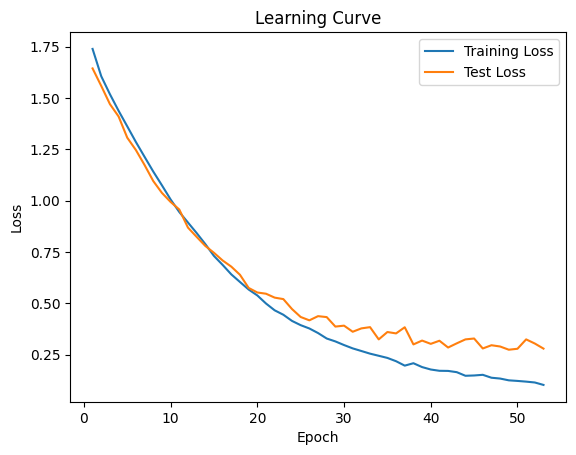

In [32]:
train_losses,test_losses,accuracy = train(modelV6, train_loader, test_loader, criterion, optimizer, num_epochs)

In [33]:
torch.save(modelV6.state_dict(), 'modelV6.pth')

In [34]:
eval(modelV6, val_loader, criterion, optimizer)

Accuracy on validation set: 94.00%


remaining accuracy

In [36]:
not_in_df = df[~df['Image_name'].isin(randomly_selected_data['Image_name'])]

In [37]:
not_in_df

,Image_name,Patient_num,Plane,Brain_plane,Operator,US_Machine,Train
0,Patient00001_Plane1_1_of_15,1,Other,Not A Brain,Other,Aloka,1
1,Patient00001_Plane1_2_of_15,1,Other,Not A Brain,Other,Aloka,1
2,Patient00001_Plane1_3_of_15,1,Other,Not A Brain,Other,Aloka,1
3,Patient00001_Plane1_4_of_15,1,Other,Not A Brain,Other,Aloka,1
4,Patient00001_Plane1_5_of_15,1,Other,Not A Brain,Other,Aloka,1
...,...,...,...,...,...,...,...
12387,Patient01789_Plane6_1_of_1,1789,Fetal thorax,Not A Brain,Other,Voluson S10,0
12390,Patient01790_Plane3_2_of_2,1790,Fetal brain,Trans-thalamic,Other,Voluson S10,0
12393,Patient01791_Plane3_2_of_3,1791,Fetal brain,Trans-thalamic,Other,Voluson S10,0
12394,Patient01791_Plane3_3_of_3,1791,Fetal brain,Trans-thalamic,Other,Voluson S10,0


In [38]:
X_rest,Y_rest = not_in_df ["Image_name"], not_in_df["Plane"]

In [47]:
rest_Y_encoded = label_encoder.fit_transform(Y_rest)

In [48]:
rest_Dataset = FetailImageDataset(X_rest,rest_Y_encoded, transform=transform)

In [49]:
rest_loader = DataLoader(rest_Dataset, batch_size=batch_size, shuffle=True)

In [50]:
eval(modelV6, rest_loader, criterion, optimizer)

Accuracy on validation set: 89.70%
